In [1]:
import json
import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
from IPython.display import Markdown, display, Javascript, display_html

def df_style(header=20, body=16, max_width=100):
    dfstyle = [dict(selector="th", props=[('font-size', f'{header}px')]),
               dict(selector="td", props=[('font-size', f'{body}px')]),
               dict(selector="td", props=[('text-align', 'center')]),
               dict(selector="th", props=[('text-align', 'center')]),
               dict(selector='th', props=[('max-width',f'{max_width}px;')])]
    return dfstyle

In [2]:
building_name = 'wildrose_residencev2'
display(Javascript('IPython.notebook.execute_cell_range(7,45)'))

<IPython.core.display.Javascript object>

In [17]:
building_name = 'wildrose_residence'
display(Javascript('IPython.notebook.execute_cell_range(7,45)'))

<IPython.core.display.Javascript object>

In [32]:
building_name = 'country_cottage'
display(Javascript('IPython.notebook.execute_cell_range(7,45)'))

<IPython.core.display.Javascript object>

In [47]:
building_name = 'aspen_house'
display(Javascript('IPython.notebook.execute_cell_range(7,45)'))

<IPython.core.display.Javascript object>

In [62]:
building_name = 'aspen_villa'
display(Javascript('IPython.notebook.execute_cell_range(7,45)'))

<IPython.core.display.Javascript object>

In [90]:
# <!-- No need to run cells below, can just run cells above^ -->

In [63]:
building_name_fmt = building_name.replace('_',' ').title()

<img src=https://res.cloudinary.com/crunchbase-production/image/upload/c_lpad,f_auto,q_auto:eco,dpr_1/htdkfr3co4n7wyxpslr0 alt="Drawing" style="width: 500px;" align="left"/>

In [64]:
display(Markdown(f"# Carbon Reduction Plan for {building_name_fmt}"))
display(Markdown("## Prepared for JCI"))
display(Markdown("### December 2022"))
display(Markdown("***"))
display(Markdown("***"))

# Carbon Reduction Plan for Aspen Villa

## Prepared for JCI

### December 2022

***

***

In [65]:
f = open(f'detailed_output_yeg_ltc_{building_name}.json')
data = json.load(f)

### Building Summary

In [66]:
# .set_table_styles(df_style(header=16, body=16, max_width=150)
building_details=pd.DataFrame([data['base_building_state']['building_type'],
             data['base_building_state']['data_points']['gross_floor_area'],
             data['base_building_state']['data_points']['num_of_floors']],
            index=['Building Type','Floor Area (m²)','Number of Floors'],
            columns=[''])

display(building_details.T.style.set_table_styles(df_style(header=16, body=16, max_width=150)))

,Building Type,Floor Area (m²),Number of Floors
,Long-Term Care Home,2213,1


<br>

### Carbon Reduction Plan Inputs

In [67]:
df_options = pd.DataFrame.from_records(data['options'],index=[''])
df_options.columns = df_options.columns.str.replace("_"," ").str.title()

df1 = df_options.loc[:,df_options.columns.str.contains("Weight")].round(2)
df2 = df_options.loc[:,['Carbon Scenario','Net Present Value Discount Rate']]
df2.loc[:,'Carbon Scenario'] = df2.loc[:,'Carbon Scenario'].str.replace('_'," ").str.title()
df2.loc["",["2022 Carbon Price per Tonne","2030 Carbon Price per Tonne","2050 Carbon Price per Tonne"]] = [50,170,300]

df3 = pd.DataFrame([data['building_profiles'][0]['elec_rate'],
              data['building_profiles'][0]['gas_rate']],
             index=['Electricity Cost ($/kWh)','Natural Gas Cost ($/kWh)'],
            columns=[""]).T

### print dataframes side by side
space = "\xa0" * 5

df1_s = df1.style.set_table_attributes("style='display:inline'")
df2_s = df2.style.set_table_attributes("style='display:inline'")
df3_s = df3.style.set_table_attributes("style='display:inline'")

df1_mapper = {k: "{0:.2f}" for k in df1.columns}
df2_mapper = {k: "${0:.0f}" for k in ['2022 Carbon Price per Tonne','2030 Carbon Price per Tonne','2050 Carbon Price per Tonne']}
df2_mapper['Net Present Value Discount Rate'] = '{:,.0%}'
df3_mapper = {k: "{0:.4f}" for k in df3.columns}

display_html(df1_s.set_table_styles(df_style(header=16, body=16, max_width=75)).format(df1_mapper)._repr_html_()
             +space+df2_s.set_table_styles(df_style(header=16, body=16, max_width=75)).format(df2_mapper)._repr_html_()
             +space+df3_s.set_table_styles(df_style(header=16, body=16, max_width=100)).format(df3_mapper)._repr_html_(), raw=True)


Weight Abatement Cost 
 Weight Emission Saving 
 Weight Net Present Value 
 Weight Payback Years 
 
 
 
 
 
 0.00 
 0.75 
 0.25 
 0.00 
 
 
 
     
 
 
 
   
 Carbon Scenario 
 Net Present Value Discount Rate 
 2022 Carbon Price per Tonne 
 2030 Carbon Price per Tonne 
 2050 Carbon Price per Tonne 
 
 
 
 
 
 Current Policies 
 3% 
 $50 
 $170 
 $300 
 
 
 
     
 
 
 
   
 Electricity Cost ($/kWh) 
 Natural Gas Cost ($/kWh) 
 
 
 
 
 
 0.1678 
 0.0426

<br>

### Carbon Reduction Plan Summary

In [68]:
CRMs_df = pd.DataFrame.from_records(data['building_profiles'])

CRMs_df_all = CRMs_df.copy()
CRMs_df_all = pd.concat([CRMs_df_all.drop(['energy_model'], axis=1), CRMs_df_all['energy_model'].apply(pd.Series)], axis=1)
CRMs_df_all = CRMs_df_all.set_index(['year'])

incremental_cost = CRMs_df_all.loc[:,'incremental_cost'].sum()
abatement_cost_per_carbon = CRMs_df_all.loc[:,'abatement_cost'].mean()
actual_emission_saving = CRMs_df_all.loc[:,'actual_emission_saving'].sum()

df_metrics = pd.DataFrame([incremental_cost, abatement_cost_per_carbon, actual_emission_saving],
            index=['Total Incremental Cost','Average Abatement Cost per Tonne of Carbon Saved','Total Tonnes of Carbon Avoided'],
                         columns=['']).T

format_mapping={'Total Incremental Cost':'${:,.0f}' , 
                'Average Abatement Cost per Tonne of Carbon Saved':'${:,.2f}',
                'Total Tonnes of Carbon Avoided':'{:,.0f}'}

#teui & carbon totals
eui_2022=(CRMs_df_all.loc[2022,'total_elec_consumption'] + CRMs_df_all.loc[2022,'total_gas_consumption']).astype('int')
eui_2050=(CRMs_df_all.loc[2050,'total_elec_consumption'] + CRMs_df_all.loc[2050,'total_gas_consumption']).astype('int')

ghgs = CRMs_df_all.loc[:,['utilities_carbon_emission']]/1000
ghgs_2022=ghgs.loc[2022][0].astype('int')
ghgs_2050=ghgs.loc[2050][0].astype('int')

summary_df = pd.DataFrame([[ghgs_2022, ghgs_2050, f'{int((ghgs_2022-ghgs_2050)/ghgs_2022*100)}%'],
                           [eui_2022, eui_2050, f'{int((eui_2022-eui_2050)/eui_2022*100)}%']],
            index=['Carbon Emissions (Tonnes CO₂e)','Energy Use Intensity (kWh/m²)'],
            columns=['2022','2050','Savings']).T

#print dataframes side by side
space = "\xa0" * 15
df1_styler = df_metrics.style.set_table_attributes("style='display:inline'")
df2_styler = summary_df.style.set_table_attributes("style='display:inline'")

display_html(df1_styler.set_table_styles(df_style(header=16, body=16, max_width=150)).format(format_mapping)._repr_html_()+space+df2_styler.set_table_styles(df_style(header=16, body=16, max_width=150))._repr_html_(), raw=True)


Total Incremental Cost 
 Average Abatement Cost per Tonne of Carbon Saved 
 Total Tonnes of Carbon Avoided 
 
 
 
 
 
 $430,481 
 $79.74 
 135,088 
 
 
 
               
 
 
 
   
 Carbon Emissions (Tonnes CO₂e) 
 Energy Use Intensity (kWh/m²) 
 
 
 
 
 2022 
 210 
 404 
 
 
 2050 
 75 
 167 
 
 
 Savings 
 64% 
 58%

<br>

#### Yearly Carbon Reduction Measures

In [69]:
CRMs_df = CRMs_df.loc[:,['crm_name', 'year', 'like_for_like_cost', 'total_measure_cost',
       'incremental_cost', 'payback_years', 'net_present_value',
       'internal_rate_of_return', 'abatement_cost', 'actual_emission_saving']]

format_mapping={'Like For Like Cost'     : '${:,.0f}' , 
                'Total Measure Cost'     : '${:,.0f}' ,
                'Incremental Cost'       : '${:,.0f}' ,
                'Payback Years'          :  '{:,.1f}' ,
                'Net Present Value'      : '${:,.0f}' ,
                'Internal Rate Of Return':  '{:,.2%}',
                'Abatement Cost'         : '${:,.0f}' ,
                'Actual Emission Saving' :  '{:,.0f}'}

CRMs_df = CRMs_df[CRMs_df['crm_name'] != "No Action"].tail(-1)
CRMs_df = CRMs_df.set_index(['crm_name'])

CRMs_df.columns = CRMs_df.columns.str.replace("_"," ")
CRMs_df.columns = map(str.title, CRMs_df.columns)
CRMs_df.index = map(str.title, CRMs_df.index)

display(CRMs_df.style.format(format_mapping))

,Year,Like For Like Cost,Total Measure Cost,Incremental Cost,Payback Years,Net Present Value,Internal Rate Of Return,Abatement Cost,Actual Emission Saving
Install Led Lighting,2023,$0,"$44,260","$44,260",8.5,"$5,095",5.39%,$-57,"22,690"
Install Domestic Hot Water Air-Source Heat Pump,2024,"$12,600","$45,000","$32,400",5.4,"$43,213",16.76%,$-97,"26,071"
Reduce Air Infiltration With Pressure-Applied Atomized Sealant,2025,$0,"$10,000","$10,000",2.1,"$64,775",61.15%,$-236,"12,995"
Install Dcv Controls,2026,$0,"$8,400","$8,400",2.5,"$23,610",55.75%,$-214,"9,798"
Install Heat-Only Air Source Heat Pump,2027,$0,"$117,855","$117,855",211.0,"$-108,804",-12.51%,"$1,428","3,934"
"Install Hybrid, High-Efficency Rtu Air Source Heat Pump(S)",2031,"$31,200","$40,856","$9,656",8.8,"$6,587",9.41%,$-72,"5,928"
Increase Roof Insulation,2036,"$309,820","$354,080","$44,260",69.8,"$-36,513",-16.09%,"$1,869","1,889"
Install Rooftop Pv,2037,$0,"$163,650","$163,650",5.6,"$173,991",19.00%,$-308,"42,423"


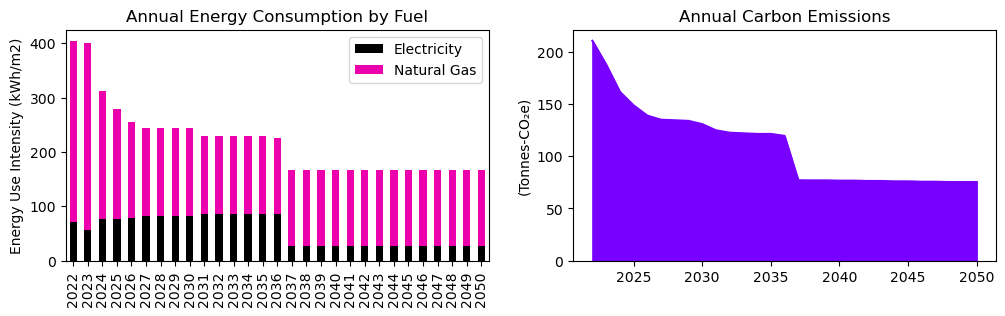

In [70]:
colours = ['#000000', '#eb02ad']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

CRMs_df_all.loc[:,['total_elec_consumption','total_gas_consumption']].plot(
    kind='bar', 
    stacked=True,
    title='Annual Energy Consumption by Fuel',
    legend=True,
    ylabel='Energy Use Intensity (kWh/m2)',
    xlabel='',
    ax=axes[0],
    color=colours)

ghgs = CRMs_df_all.loc[:,['utilities_carbon_emission']]/1000
ghgs.plot(
    kind='area', 
    title='Annual Carbon Emissions',
    legend=False,
    ylabel='(Tonnes-CO₂e)',
    xlabel='',
    ax=axes[1],
    color='#7700ff')

axes[0].legend(["Electricity", "Natural Gas"]);

plt.show()

<br>

***

### Existing Building Performance

***

#### Monthly Breakdown by End Use & Fuel Type

In [71]:
#convert to data frame
df = pd.DataFrame.from_records(data['building_profiles'][0]['energy_model']['data'])
df = df.groupby(by = ['fuel_type','period','end_use'], ).sum(numeric_only=True).unstack()#.reset_index()

#split annual into monthly & drop annual
for col_idx, col in df.items():
    for fuel in ['electricity','natural_gas']:
        d = col.loc[fuel]
        if d.loc['annual'] > 0:
            d.loc[[1,2,3,4,5,6,7,8,9,10,11,12]] = d.loc['annual']/12

df = df.drop(['annual'],level=1)
df = df.droplevel(level=0,axis=1)

#match period values to month names
idx = pd.Series(df.index.get_level_values(1))
idx = idx.apply(lambda x: calendar.month_name[x])
df.index = pd.MultiIndex.from_arrays([df.index.get_level_values(level=0), idx])

#combine heating & cooling
df['Heating'] = df['oa_heating'] + df['skin_heating']
df = df.drop(['oa_heating','skin_heating'],axis=1)
if 'oa_cooling' in df.columns:
    df['Cooling'] = df['oa_cooling'] + df['skin_cooling']
    df = df.drop(['oa_cooling','skin_cooling'],axis=1)
else:
    df['Cooling'] = df['skin_cooling']
    df = df.drop(['skin_cooling'],axis=1)

#rename columns
mapper = {'dhw':'DHW',
         'fans':'Fans',
         'lighting':'Lights',
         'plugload':'Plugs',
         'pumps':'Pumps',
         'renewable':'Renewable',
         'process':'Process'}
df = df.rename(columns=mapper)

#reorder columns for graph
if 'process' in df.columns:
    df = df[['Lights','Plugs','Pumps','Fans','DHW','Heating','Cooling','Process']]
else:
    df = df[['Lights','Plugs','Pumps','Fans','DHW','Heating','Cooling']]

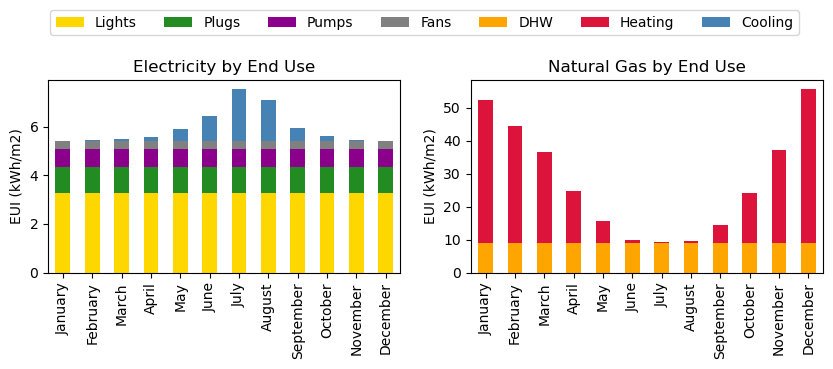

In [72]:
colours = ['gold', 'forestgreen', 'darkmagenta', 'grey', 'orange', 'crimson', 'steelblue','darkgrey']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,2.5))
df.loc['electricity'].plot(
    kind='bar', 
    stacked=True,
    title='Electricity by End Use',
    legend=False,
    ylabel='EUI (kWh/m2)',
    xlabel='',
    ax=axes[0],
    color=colours)

df.loc['natural_gas'].plot(
    kind='bar', 
    stacked=True, 
    title='Natural Gas by End Use',
    legend='left',
    ylabel='EUI (kWh/m2)',
    xlabel='',
    ax=axes[1],
    color=colours)

plt.legend(ncol=len(df.columns), bbox_to_anchor=(0.95, 1.4))
plt.show()

<br>

#### Annual Breakdown by End Use

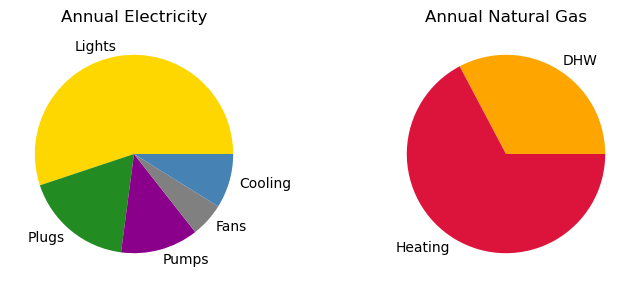

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
df.loc['electricity'].sum().plot(
    kind='pie', 
    title='Annual Electricity',
    colors=colours,
    ax=axes[0],
    ylabel='')

df.loc['natural_gas'].sum().plot(
    kind='pie', 
    title='Annual Natural Gas',
    colors=colours,
    ax=axes[1],
    ylabel='')

plt.subplots_adjust(wspace=0.5)
plt.show()

<br>

#### Annual Breakdown by Fuel Type

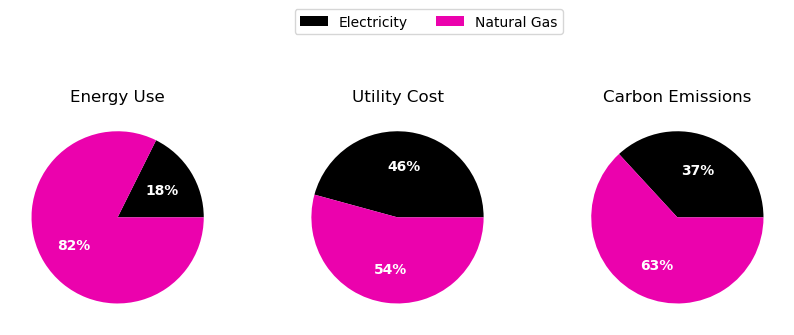

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

colours = ['#000000', '#eb02ad']
elec = df.loc['electricity'].sum().sum()
gas  = df.loc['natural_gas'].sum().sum()
axes[0].pie([elec, gas], colors=colours, autopct='%0.0f%%', textprops={'color':"w", 'weight':'bold'})
axes[0].set_title('Energy Use')

elec2 = df.loc['electricity'].sum().sum() * data['building_profiles'][0]['elec_rate']
gas2  = df.loc['natural_gas'].sum().sum() * data['building_profiles'][0]['gas_rate']
axes[1].pie([elec2, gas2], colors=colours, autopct='%0.0f%%', textprops={'color':"w", 'weight':'bold'})
axes[1].set_title('Utility Cost')

gas3  = df.loc['natural_gas'].sum().sum() * 0.18 * data['base_building_state']['data_points']['gross_floor_area']
elec3 = data['building_profiles'][0]['utilities_carbon_emission'] - gas3
axes[2].pie([elec3, gas3], colors=colours, autopct='%0.0f%%', textprops={'color':"w", 'weight':'bold'})
axes[2].set_title('Carbon Emissions')

plt.legend(['Electricity', 'Natural Gas'],ncol=len(df.columns), bbox_to_anchor=(0.0, 1.5))
plt.subplots_adjust(wspace=0.3)
plt.show()

***

### Equipment Summary

***

In [75]:
#convert to data frame
df = pd.DataFrame.from_records(data['base_building_state']['equipment_list'])
df = df.drop(['equipment_config'],axis=1)
for name in df['name']:
    if name == 'boiler':
        df = df.replace([name], 'gas-fired boiler')
    if name == 'dhw_heater':
        df = df.replace([name], 'dhw heater')
    if name == 'terminal_unit':
        df = df.replace([name], 'gas-fired furnance with ac')

df = pd.concat([df.drop(['properties'], axis=1), df['properties'].apply(pd.Series)], axis=1)

df.loc[:,'combined system size (heating tons)'] = df.loc[:,'system_size'].fillna(0) + df.loc[:,'system_size_heating_primary'].fillna(0) + df.loc[:,'system_size_heating_secondary'].fillna(0)
df = df.rename(columns={'system_size_cooling':'combined system size (cooling tons)'})
df[df.columns[df.columns.str.contains('size')]] = df.loc[:,df.columns.str.contains('size')].fillna(0).astype(int)

for col in  ['system_size','system_type','system_size_heating_primary','system_size_heating_secondary','energy_density']:
    if col in df.columns:
        df = df.drop([col],axis=1)

df = df.drop(['present'],axis=1)

df = df.set_index('name')
df.index.names = ['equipment']
df.columns = df.columns.str.replace("_"," ")

df.columns = map(str.title, df.columns)
df.index = map(str.title, df.index)
df = df.rename(index={'Dhw Heater':'DHW Heater','Mua':'MUA','Gas-Fired Furnance With Ac':'Gas-Fired Furnance With AC'})

if 'Clothes_Dryer' in df.index:
    df = df.drop(['Clothes_Dryer'])

display(df)

,Installation Year,Combined System Size (Cooling Tons),Combined System Size (Heating Tons)
Gas-Fired Boiler,2011,0,100
Rtu,2011,18,26
DHW Heater,2011,0,30
MUA,2011,0,31


In [76]:
display(Javascript('IPython.notebook.save_notebook()'))
jupyter_nb_filename=f'html_detailed_output_yeg_ltc_{building_name}'
!!jupyter nbconvert "MOP_Results_v3.ipynb" --to=html --TemplateExporter.exclude_input=True --output $jupyter_nb_filename


<IPython.core.display.Javascript object>

['[NbConvertApp] Converting notebook MOP_Results_v3.ipynb to html',
 '[NbConvertApp] Writing 765211 bytes to html_detailed_output_yeg_ltc_aspen_villa.html']